### Case 2 - Computational Data Analysis

#### UTKFaces dataset:

We use the clean version of the data (cropped and aligned) as given in the provided 'data.zip' file. 

- Faces: contains 23705 aligned and cropped images of shape (200 x 200 x 3) i.e. (Height x Width x Channel).
- labels.csv: labels of the images in the same order as the images in the 'Faces' folder; given in comma separated format as: age, gender, race.
- filenames.txt: original filenames of the images in the same order as the images and the labels.

#### Usual imports:

In [1]:
import os
import numpy as np
import skimage
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import numpy.linalg as linalg
import cmath
from skimage.io import imread,imshow
from skimage.color import rgb2gray 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#### Upload data:

<font color='red'> I get MemoryError so I am working with a smaller dataset of 5000 images </font>

In [2]:
# Upload all images in a multidimensional array (Number of images x Height x Width x Channels):

path_faces = '/Users/Miren/COMPUTATIONAL DATA ANALYSIS/CASE 2/Faces/'
path_labels = '/Users/Miren/COMPUTATIONAL DATA ANALYSIS/CASE 2/labels.csv'

def load_images(folder):
    images = []
    # n_imgs = len(os.listdir(folder))  
    n_imgs = 5000
    for filename in range(n_imgs):
        img = mpimg.imread(os.path.join(folder, str(filename)+'.jpg'))
        if img is not None:
            images.append(img)
    return images

dataimgs = np.array(load_images(path_faces))
    
# labels on 'age', 'gender', and 'race' diven for each image. 

labels = pd.read_csv(path_labels,names=['age','gender','race'])

# We do not need the information in 'filenames.txt'

In [3]:
type(dataimgs)

numpy.ndarray

In [4]:
n_imgs = dataimgs.shape[0]
height = dataimgs.shape[1]
width = dataimgs.shape[2]
channels = dataimgs.shape[3]

print("Number of images: ",n_imgs)
print("Height: ", height)
print("Width: ", width)
print("Number of channels: ", channels)

Number of images:  5000
Height:  200
Width:  200
Number of channels:  3


### Data Profilling
Run this part if you want to have the data summary. Change the output file directory.

In [5]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(labels)
#prof.to_file(output_file='C:/Users/belki/Documents/MSc/02582 Computational Data Analysis - Spring 2022/case2/output.html')

#### Gender and Race Distribution

In [6]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     23705 non-null  int64
 1   gender  23705 non-null  int64
 2   race    23705 non-null  int64
dtypes: int64(3)
memory usage: 555.7 KB


<Figure size 1500x800 with 0 Axes>

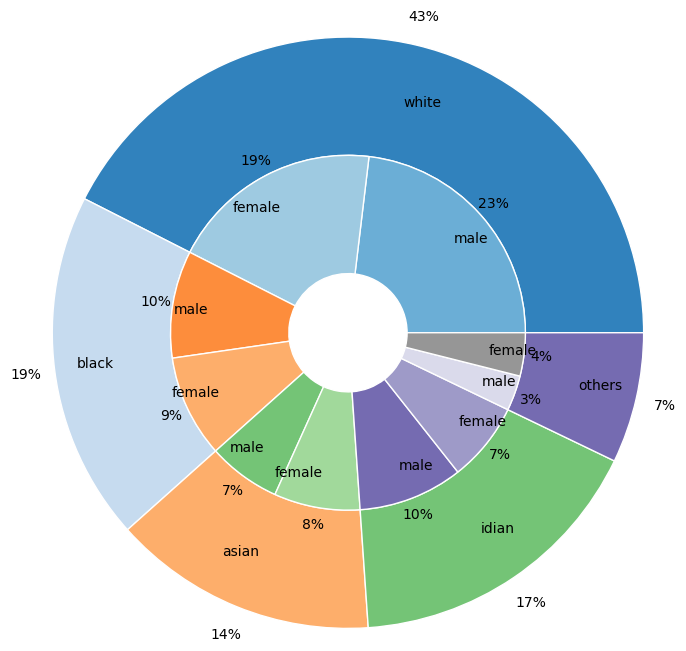

In [7]:
from matplotlib.pyplot import figure
figure(figsize=(15, 8))
fig, ax = plt.subplots()

size = 0.8

race = ['white', 'black', 'asian', 'idian', 'others']

data = np.zeros((len(race), 2))

for i in range(len(race)):
    male = labels[(labels['race'] == i) & (labels['gender'] == 0)]
    female = labels[(labels['race'] == i) & (labels['gender'] == 1)]
    data[i] = [len(male), len(female)]
    i += 1


# Creating color scale
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(len(race))*3)
inner_colors = cmap(np.array([1, 2, 5, 6, 9,
                              10, 12, 13, 15,
                              17]))

ax.pie(data.sum(axis=1), 
                     radius=2, 
                     colors=outer_colors, 
                     wedgeprops=dict(width=size, edgecolor='w'), 
                     labels = race, 
                     autopct='%1.0f%%', pctdistance=1.1, labeldistance=0.8)

ax.pie(data.flatten(), 
       radius=2-size, 
       colors=inner_colors, 
       wedgeprops=dict(width=size, edgecolor='w'), 
       labels = ['male', 'female']*len(race), 
       autopct='%1.0f%%',pctdistance=1.1, labeldistance=0.8)

#ax.set(aspect="equal", title='Race and Gender Distribution')
#plt.title('Race and Gender Distribution')#, fontsize=18, pad=15)
plt.show()

#### Age and Race Distribution

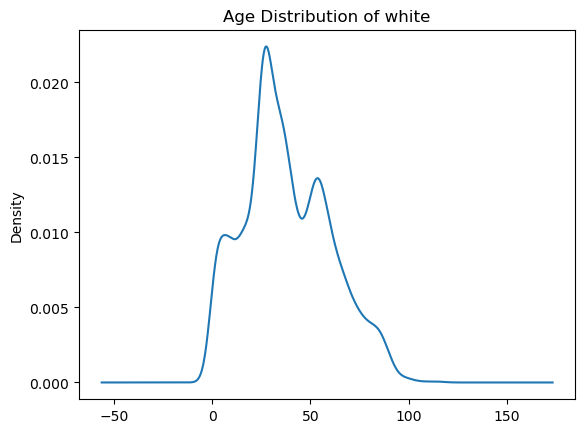

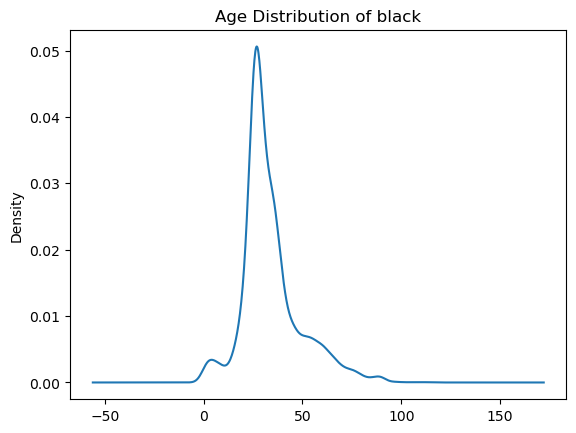

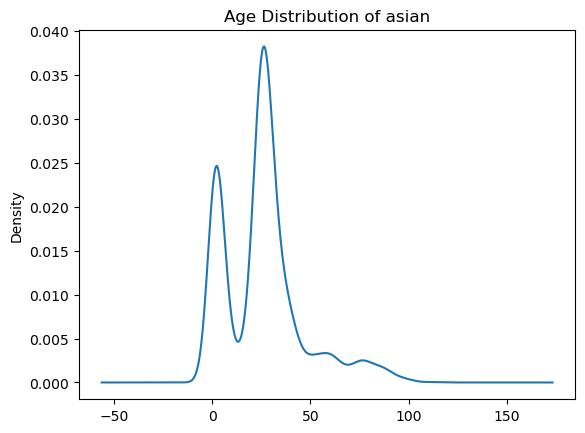

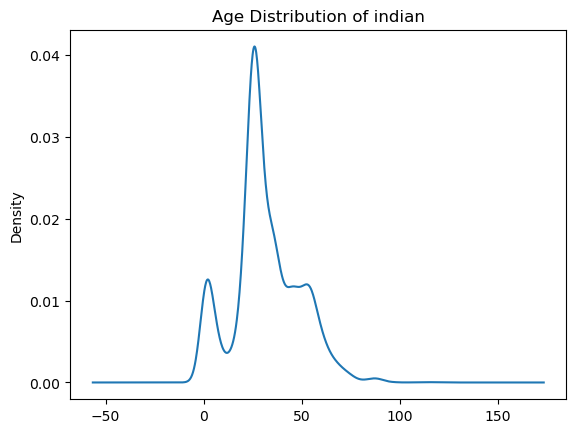

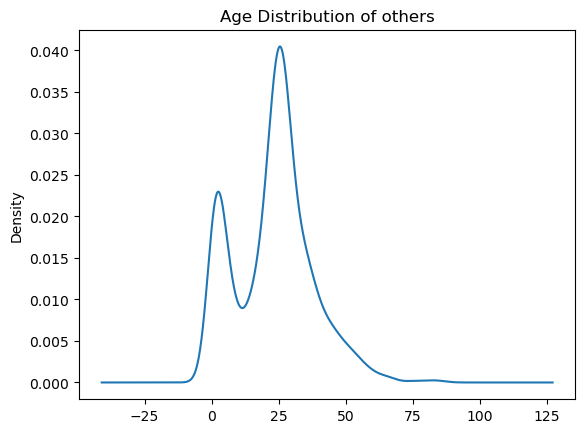

In [8]:
race_dict = {0: 'white', 1: 'black', 2: 'asian', 3: 'indian', 4: 'others'}
for i in range(len(race)):
    labels[labels['race'] == i]['age'].plot.density()
    title = 'Age Distribution of ' + race_dict[i]
    plt.title(title)
    plt.show()

### Random Sample
As clearly shown in the above pie chart, the race distribution is uneven. In order to have evenly distributed number in each race for further study, equal amount of random samples are taken from each race group.

In [9]:
max_aux = len(labels[labels['race'] == 4])
print('Max number of smaple for each race: {}'.format(max_aux))
print('Max total number of sample can be used: {}'.format(max_aux*5))

Max number of smaple for each race: 1692
Max total number of sample can be used: 8460


In [10]:
max_aux = max_aux - 500
print('Used number of smaple for each race: {}'.format(max_aux))
print('Used total number of sample can be used: {}'.format(max_aux*5))

Used number of smaple for each race: 1192
Used total number of sample can be used: 5960


In [11]:
number_of_sample = max_aux
random_white = (labels[labels['race'] == 0]).sample(n = max_aux)
random_black = (labels[labels['race'] == 1]).sample(n = max_aux)
random_asian = (labels[labels['race'] == 2]).sample(n = max_aux)
random_indian = (labels[labels['race'] == 3]).sample(n = max_aux)
random_others = (labels[labels['race'] == 4]).sample(n = max_aux)

print("Number of white in random sample: {}".format(len(random_white)))
print("Number of black in random sample: {}".format(len(random_black)))
print("Number of asian in random sample: {}".format(len(random_asian)))
print("Number of indian in random sample: {}".format(len(random_indian)))
print("Number of others in random sample: {}".format(len(random_others)))

Number of white in random sample: 1192
Number of black in random sample: 1192
Number of asian in random sample: 1192
Number of indian in random sample: 1192
Number of others in random sample: 1192


We can investigate the gender and age distribution in each race by the following code.

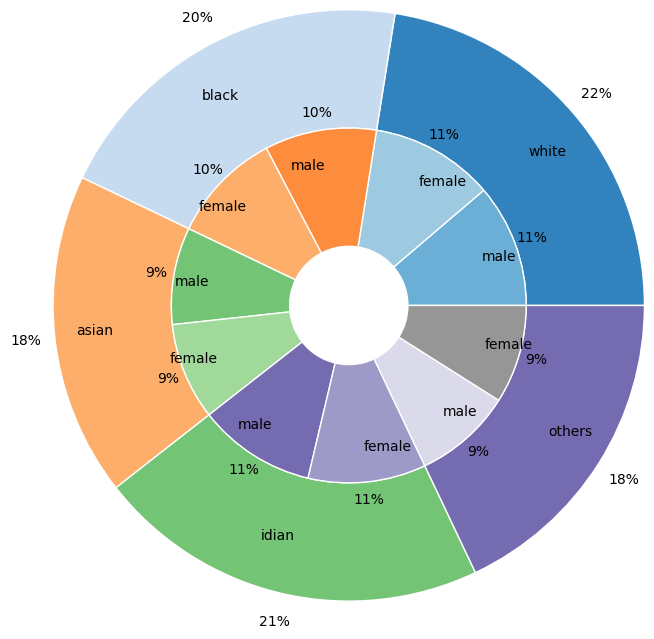

In [12]:
from matplotlib.pyplot import figure
#figure(figsize=(15, 8))
fig, ax = plt.subplots()

size = 0.8

race = ['white', 'black', 'asian', 'idian', 'others']
random_data_list = [random_white, random_black, random_asian, random_indian, random_others]

data = np.zeros((len(race), 2))

for i in range(len(random_data_list)):
    random_race = random_data_list[i]
    male = random_race[random_race['gender'] == 0]
    female = random_race[random_race['gender'] == 0]
    data[i] = [len(male), len(female)]
    i += 1


# Creating color scale
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(len(race))*3)
inner_colors = cmap(np.array([1, 2, 5, 6, 9,
                              10, 12, 13, 15,
                              17]))

ax.pie(data.sum(axis=1), 
                     radius=2, 
                     colors=outer_colors, 
                     wedgeprops=dict(width=size, edgecolor='w'), 
                     labels = race, 
                     autopct='%1.0f%%', pctdistance=1.1, labeldistance=0.8)

ax.pie(data.flatten(), 
       radius=2-size, 
       colors=inner_colors, 
       wedgeprops=dict(width=size, edgecolor='w'), 
       labels = ['male', 'female']*len(race), 
       autopct='%1.0f%%',pctdistance=1.1, labeldistance=0.8)

#ax.set(aspect="equal", title='Race and Gender Distribution')
#plt.title('Random Race and Gender Distribution')#, fontsize=18, pad=15)
plt.show()


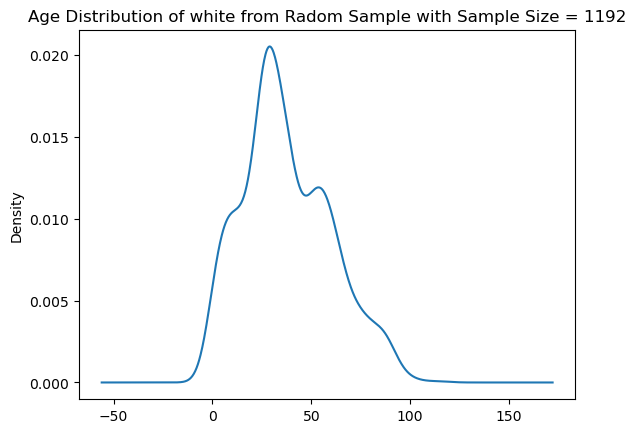

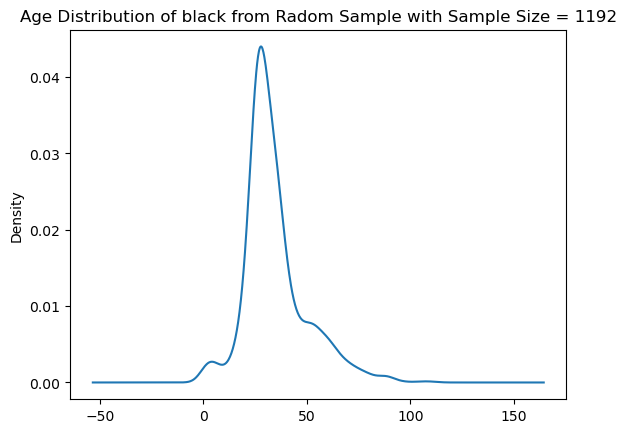

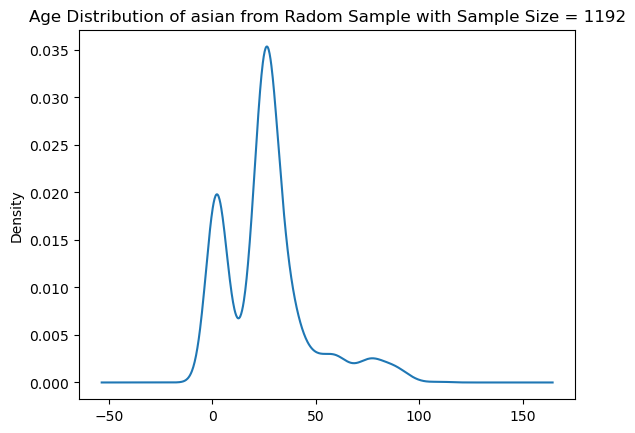

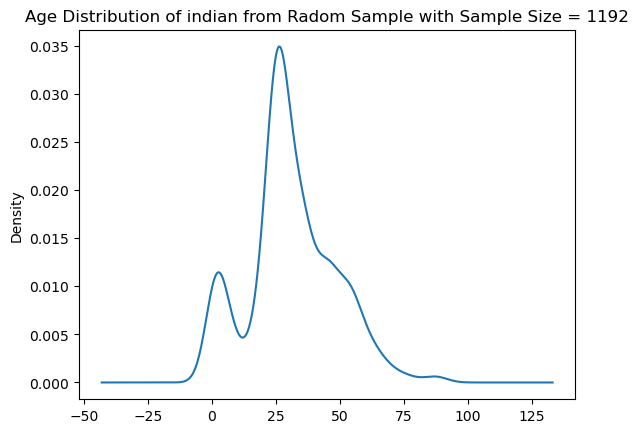

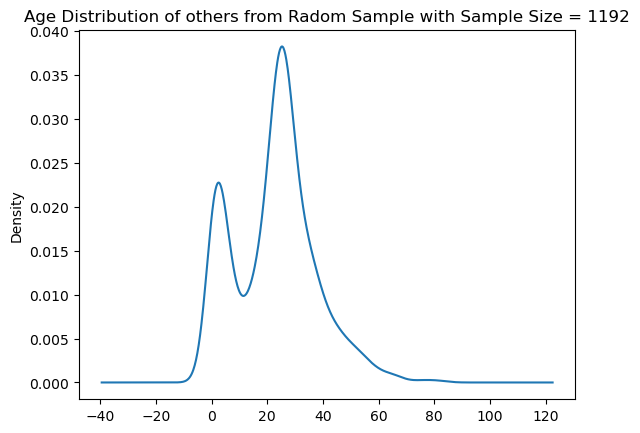

In [13]:
race_dict = {0: 'white', 1: 'black', 2: 'asian', 3: 'indian', 4: 'others'}
for i in range(len(race)):
    random_race = random_data_list[i]
    random_race['age'].plot.density()
    #labels[labels['race'] == i]['age'].plot.density()
    title = 'Age Distribution of ' + race_dict[i] + ' from Radom Sample with Sample Size = ' + str(max_aux)
    plt.title(title)
    plt.show()

In [14]:
# Upload all images in a multidimensional array (Number of images x Height x Width x Channels):

def load_images(folder, index):
    images = []
    for filename in index:
        img = mpimg.imread(os.path.join(folder, str(filename)+'.jpg'))
        if img is not None:
            images.append(img)
    return images

# get the row index of all the random observations
random_race = [random_white, random_black, random_asian, random_indian, random_others]
random_index = list()
for race in random_race:
    values = race.index.values
    for value in values:
        random_index.append(value)

random.shuffle(random_index)

# random_index.sort()
random_array = np.array(load_images(path_faces, random_index))

# labels on 'age', 'gender', and 'race' diven for each image. 

labels_random = labels.iloc[random_index]

# We do not need the information in 'filenames.txt'

In [15]:
dataimgs = random_array
labels = labels_random.reset_index(drop=True)

In [16]:
n_imgs = dataimgs.shape[0]

In [17]:
indexes = list(labels.index)

Our objective would be to classify the images with the data features that have been reduced by PCA or LDA. Then, we can use K-Nearest Neighbors (KNN) algorithm to classify the image classes. 

### PCA

PCA IS UNSUPERVISED LEARNING

When performing PCA on images, we need to construct a 'flat' vactor of features, where the intensity of every pixel of an image is a feature (i.e. each image is represented as a vector instead of as a matrix). There should be no problem on using a RGB image in PCA by creating a vector of 200x200x3 features for each image, but for now, we decided to work in grayscale to reduce the dimensions of the problem and avoid MemoryErrors.

In [18]:
graydata = rgb2gray(dataimgs)

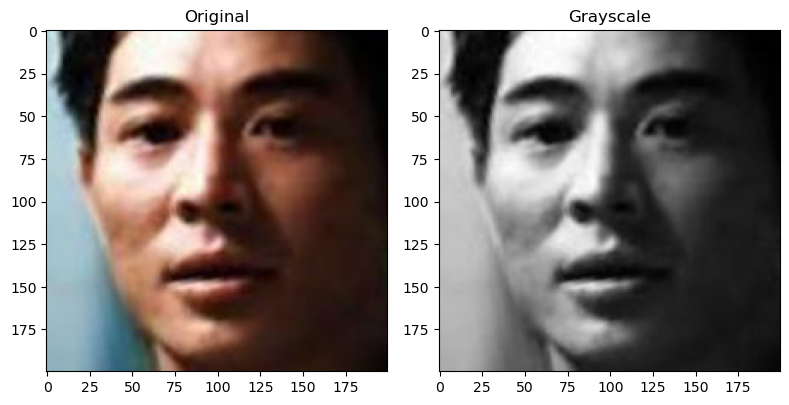

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(dataimgs[9])
ax[0].set_title("Original")
ax[1].imshow(graydata[9], cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

In [20]:
# Flatten the data: 
images = np.reshape(graydata, (n_imgs, height * width))

The idea of PCA consists on a linear transformation of data: S = XL; where we find an orthogonal transformation by the L rotation matrix over the data X, obtaining the transformed data S (score matrix) which will have maximum variance (i.e., minimum mean square error (MSE)).

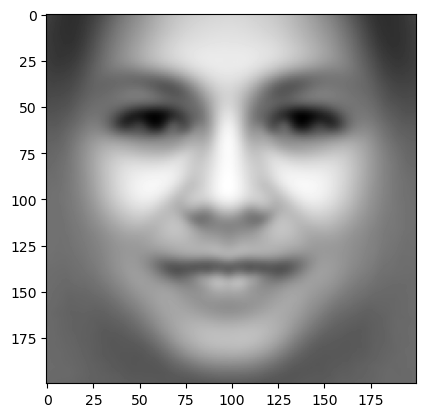

In [21]:
# mean of the data: 
img_mean = np.mean(images, axis = 0)
plt.imshow(np.reshape(img_mean,(height,width)), cmap = "gray")
plt.show()

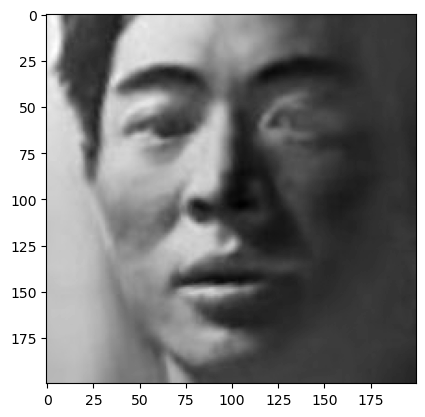

In [22]:
# Center the data (substract mean)
centered_imgs = images - img_mean
plt.imshow(np.reshape(centered_imgs[9],(height,width)), cmap = "gray")
plt.show()

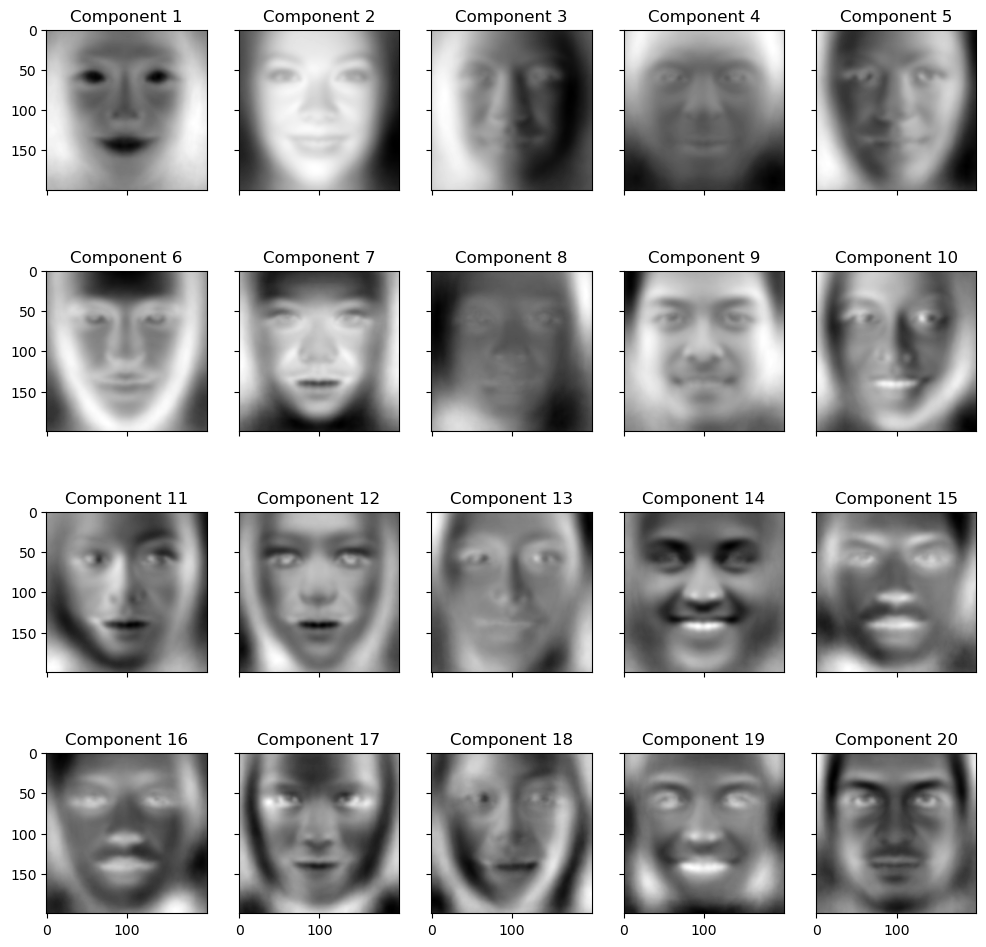

In [23]:
n_features = height*width  # n_components must be between 0 and min(n_samples, n_features)=5000 with svd_solver='full'
n_components = 200 # min(5000, n_features) # We could start with a smaller number of features too. 
pca = PCA(n_components=n_components)
S = pca.fit_transform(centered_imgs)
A = pca.components_

# Visually inspect the first 20 PCA components as images:
img_plot = np.reshape(A, (n_components, height, width))

f, axs = plt.subplots(4, 5, figsize=(12, 12), sharex=True, sharey=True)
axs = axs.flatten()
for i, ax in zip(range(20), axs):
    ax.imshow(img_plot[i,:,:], cmap ='gray')
    ax.set_title('Component ' + str(i+1))
plt.show()

Now we can reconstruct the images with just the number of PCs we are interested in. We can choose this number by defining the certain percentage of explained variance we want to obtain (i.e., 95%) or by making a scree plot, which is the recomended method, and consists on comparing the eigenvalues to those obtained from dantomized data (with same total variance). 

##### Obtain a certain percentage of explained variance

<font color='red'>Find the reason why the percentage of expl var is usually a bad idea (and decide if we keep both and explain or just keep one)</font>

In [24]:
ratio_var = pca.explained_variance_ratio_
var_cumu = np.cumsum(ratio_var)
d=np.argmax(var_cumu>=0.95)+1

print("Number of components explaining 95% variance: ", d)

Number of components explaining 95% variance:  175


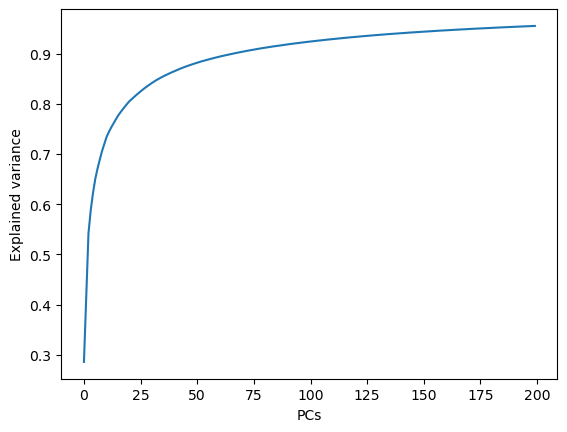

In [25]:
plt.plot(var_cumu);
plt.xlabel("PCs")
plt.ylabel("Explained variance")
plt.show()

In [26]:
images.shape

(5960, 40000)

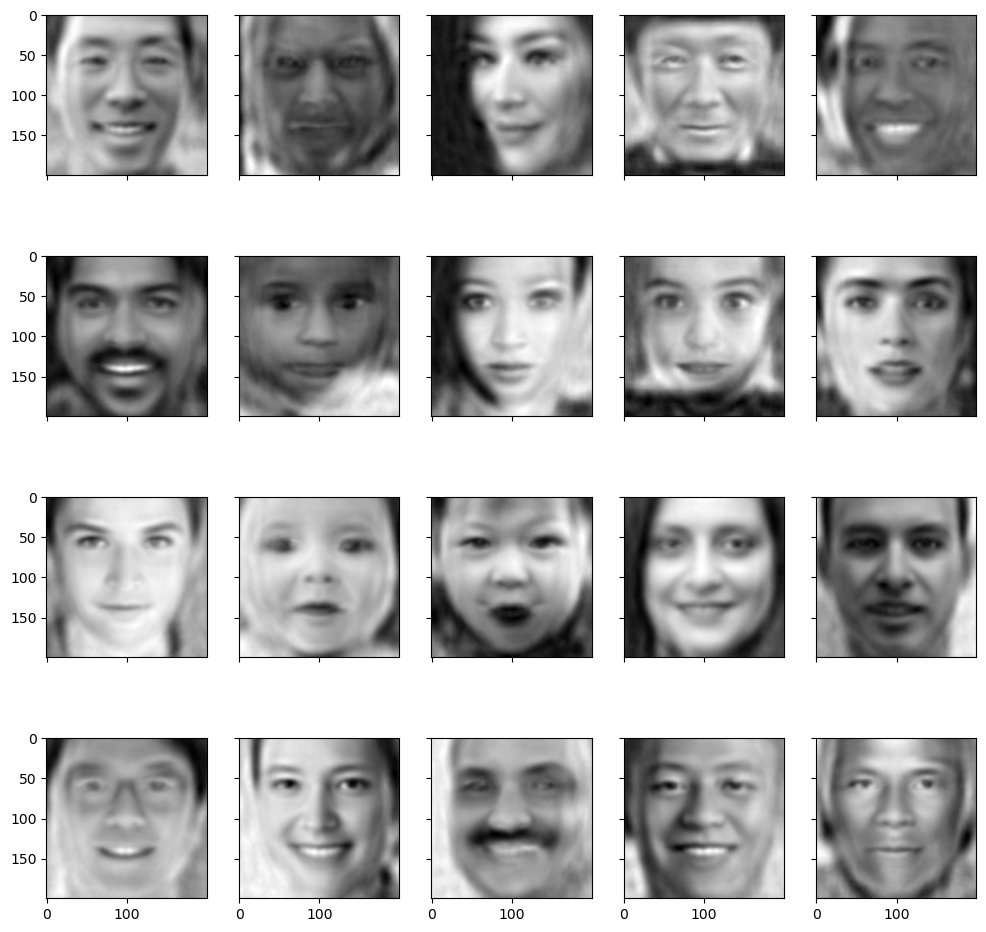

In [27]:
# Reconstruct the images using 181 components:
pca_red = PCA(n_components = d)
S_red = pca_red.fit_transform(centered_imgs)
A_red = pca_red.components_


# Visually inspect the reconstruction of the first 20 images in our dataset:
imgs_reconstr = np.matmul(S_red,A_red) + img_mean
img_plot = np.reshape(imgs_reconstr, (n_imgs, height, width))

f, axs = plt.subplots(4, 5, figsize=(12, 12), sharex=True, sharey=True)
axs = axs.flatten()
for i, ax in zip(range(20), axs):
    ax.imshow(img_plot[i,:,:], cmap ='gray')
plt.show()

<font color='red'> Seems like a bad reconstrucion, like too little PCs, but maybe it works well with this few PCs even if doesn't look so visually. When we run pca with many more components we get much better results visually (therefore, the plotting is okay). </font>

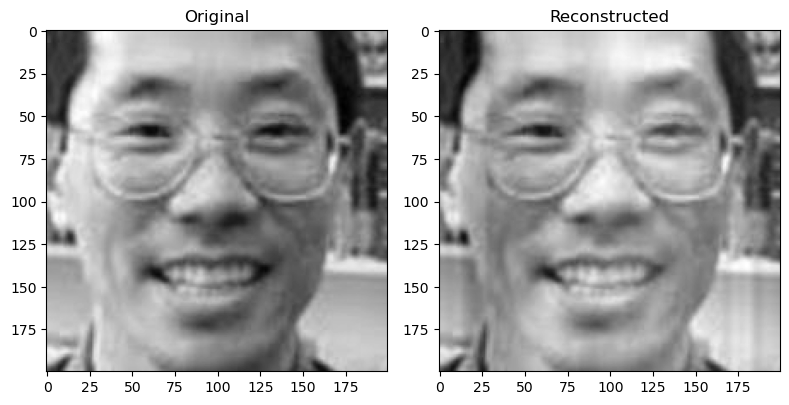

In [28]:
# PCA fitted in a single using 181 components:
pca_red_one = PCA(n_components = d)

S_red_one = pca_red_one.fit_transform(centered_imgs[0].reshape(200,200))
A_red_one = pca_red_one.components_

# Visually inspect the reconstruction of the first 20 images in our dataset:
img_plot = np.matmul(S_red_one,A_red_one) + img_mean.reshape(200,200)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(images[0].reshape(200,200), cmap=plt.cm.gray)
ax[0].set_title("Original")
ax[1].imshow(img_plot, cmap=plt.cm.gray)
ax[1].set_title("Reconstructed")

fig.tight_layout()
plt.show()

#### Using a scree plot

In [29]:
#Artificial data set
#Dimensions of data 5000 X 200 x 200 

art_var = np.var(graydata)
art_mean = np.mean(graydata)

a, b = 0, 1
mu, sigma = art_mean, art_var
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)

randomdata = []

for i in range(5000):
    randomdata.append([])
    for j in range(200):
        randomdata[i].append(dist.rvs(200))
        
rnd_baseline=linalg.eig(randomdata)

/Users/Miren/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


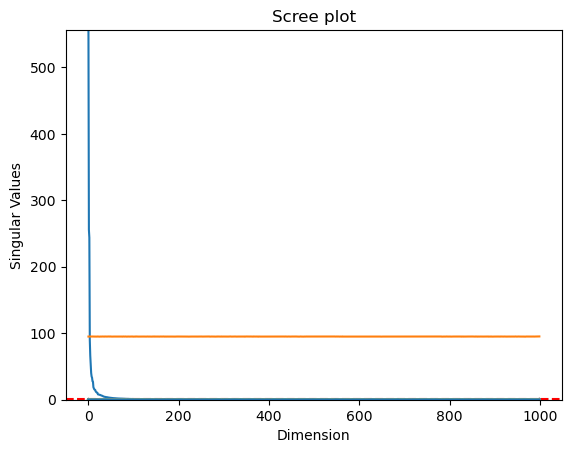

(95.01510361995261+0j)
(94.99411599651779+0j)
(94.98927528837311+0j)
(95.13916988027829+0j)
(95.05654463197035+0j)
(94.98995895214297+0j)
(95.0494137247429+0j)
(95.1082429985434+0j)
(95.02457866004747+0j)
(95.08049623467993+0j)
(95.09488680424401+0j)
(94.99835339846273+0j)
(95.06655899055114+0j)
(95.00424522702062+0j)
(94.98516473604926+0j)
(95.03225379202486+0j)
(94.99048714411077+0j)
(95.0568300293189+0j)
(94.96104672131676+0j)
(94.95540262349819+0j)


In [30]:
plt.ylabel('Singular Values')
plt.xlabel('Dimension')
plt.title('Scree plot')
plt.ylim(0, max(pca.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle = '--')
plt.plot(pca.explained_variance_)
plt.plot(rnd_baseline[0][:1000])
plt.show()
#print(len(rnd_baseline[0]))
for i in range(20):
    print(rnd_baseline[0][i][0])
    #print(rnd_baseline[1][i])

/Users/Miren/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


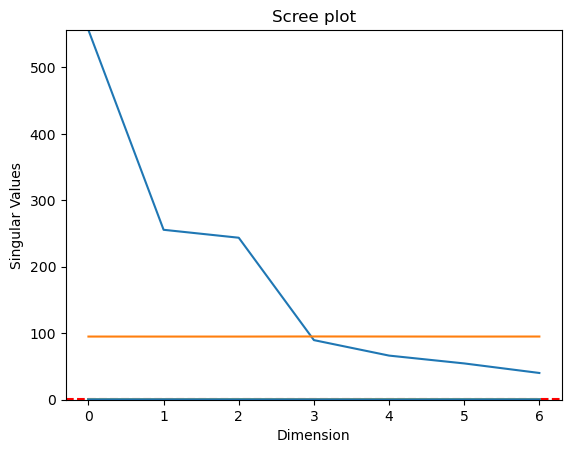

In [31]:
plt.ylabel('Singular Values')
plt.xlabel('Dimension')
plt.title('Scree plot')
plt.ylim(0, max(pca.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle = '--')
plt.plot(pca.explained_variance_[:7])
plt.plot(rnd_baseline[0][:7])
plt.show()

<font color='red'> Wich sets the number of components of interest in 3 PCs.</font>

For now, we have done dimensionality reduction using PCA. 

Now we will try to use KNN algorithm to classify the image classes by 'gender' first. For that we will split our dataset <font color='red'> (that has just 5000 images for now) </font> into training set <font color='red'> (4000 images for now) </font> and test set <font color='red'> (the remaining 1000 images)</font>. We will try KNN for 3 cases: 167 components as stated in the case of obtaining more than 95% of explained variance, 3 components as result of observing the scree plot, and 1000 componens as the case of too good reconstructions. 

In [23]:
# Split into train and test datasets: 
idxs_train = random.sample(indexes, int(n_imgs*0.8))
idxs_test = [i for i in indexes if i not in idxs_train]

gender_train = labels['gender'][idxs_train]
gender_test = labels['gender'][idxs_test].reset_index(drop=True)

race_train = labels['race'][idxs_train]
race_test = labels['race'][idxs_test].reset_index(drop=True)

In [24]:
len(idxs_test)

1192

In [25]:
len(idxs_train)

4768

In [27]:
# PCA
d = 175

for n_components in [1000, d, 3]:
    imgs_train = centered_imgs[idxs_train]
    imgs_test = centered_imgs[idxs_test]
    
    print('____________________________ \n')
    print('Case 1. Number of components = ', n_components)
    n_features = height*width  # n_components must be between 0 and min(n_samples, n_features)=5000 with svd_solver='full'
    pca = PCA(n_components=n_components)
    imgs_train = pca.fit_transform(imgs_train)
    imgs_test = pca.fit_transform(imgs_test)

    k = 5
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    knn_model.fit(imgs_train, gender_train) 
    gender_predict = knn_model.predict(imgs_test)

    knn_model.fit(imgs_train, race_train) 
    race_predict = knn_model.predict(imgs_test)

    count_genre = 0
    count_race = 0

    for i in range(len(idxs_test)):
        if gender_test[i]==gender_predict[i]:
            count_genre += 1
        if race_test[i]==race_predict[i]:
            count_race +=1

    accuracy_genre = count_genre/1000
    accuracy_race = count_race/1000

    print('Accuracy_genre = ', accuracy_genre)
    print('Accuracy_race = ', accuracy_race)

____________________________ 

Case 1. Number of components =  1000
Accuracy_genre =  0.717
Accuracy_race =  0.355
____________________________ 

Case 1. Number of components =  175
Accuracy_genre =  0.723
Accuracy_race =  0.351
____________________________ 

Case 1. Number of components =  3
Accuracy_genre =  0.677
Accuracy_race =  0.319


<font color='red'> The accuracy did not change too much between each case, that's a good thing I suppose, because it would mean that from 3 components we are getting almost as same useful information than from 167 and from 1000, right? </font>.

### LDA

LDA IS SUPERVISED LEARNING

In Linear Discriminant Analysis (LDA) instead of maximizing the variance, we will minimize the variance and find the axes that maximize the separation between the class mean.

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

imgs_train = centered_imgs[idxs_train]
imgs_test = centered_imgs[idxs_test]

n_features = height*width 
lda = LinearDiscriminantAnalysis(n_components=None)  #n_components = min(n_classes - 1, n_features)

Number of components explaining 95% variance:  1


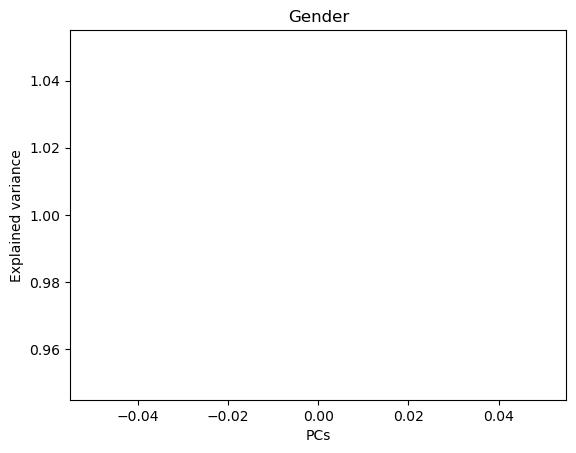

In [29]:
#genre
imgs_train_gender = lda.fit_transform(imgs_train, gender_train)
imgs_test_gender = lda.transform(imgs_test)

lda_var_ratios = lda.explained_variance_ratio_
var_cumu = np.cumsum(lda_var_ratios)
d_gender=np.argmax(var_cumu>=0.95)+1

print("Number of components explaining 95% variance: ", d_gender)

plt.plot(var_cumu);
plt.title('Gender')
plt.xlabel("PCs")
plt.ylabel("Explained variance")
plt.show()

In [30]:
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)

knn_model.fit(imgs_train_gender, gender_train) 
gender_predict = knn_model.predict(imgs_test_gender)

count_gender= 0

for i in range(1000):
    if gender_test[i]==gender_predict[i]:
        count_gender +=1
        
accuracy_gender = count_gender/1000

print('Accuracy_race = ', accuracy_gender)

Accuracy_race =  0.662


Number of components explaining 95% variance:  3


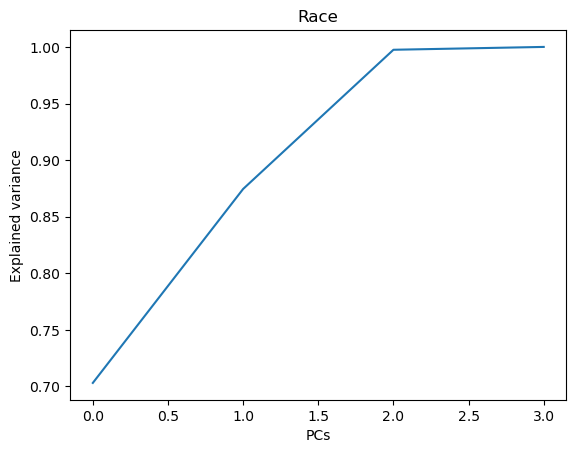

In [31]:
#race
imgs_train_race = lda.fit_transform(imgs_train, race_train)
imgs_test_race = lda.transform(imgs_test)

lda_var_ratios = lda.explained_variance_ratio_
var_cumu = np.cumsum(lda_var_ratios)
d_race=np.argmax(var_cumu>=0.95)+1

print("Number of components explaining 95% variance: ", d_race)

plt.plot(var_cumu);
plt.title('Race')
plt.xlabel("PCs")
plt.ylabel("Explained variance")
plt.show()

In [32]:
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)

knn_model.fit(imgs_train_race, race_train) 
race_predict = knn_model.predict(imgs_test_race)

count_race = 0

for i in range(1000):
    if race_test[i]==race_predict[i]:
        count_race +=1
        
accuracy_race = count_race/1000

print('Accuracy_race = ', accuracy_race)

Accuracy_race =  0.278


https://benalexkeen.com/k-nearest-neighbours-classification-in-python/
https://www.linkedin.com/pulse/dimensionality-reduction-pca-vs-lda-face-recognition-m-farhan-tandia

In [33]:
# From now on, we will use the images reconstructed from 3 PCs as derived from PCA (unsupervised):

pca_red = PCA(n_components = 3)
S_red = pca_red.fit_transform(centered_imgs)
A_red = pca_red.components_

# Visually inspect the reconstruction of the first 20 images in our dataset:
imgs_3pc = np.matmul(S_red,A_red) + img_mean

### Hierarchical Clustering

In [34]:
d_sample = 'euclidean' 
d_group = 'ward' 


Z = linkage(imgs_3pc, method=d_group, metric=d_sample) 

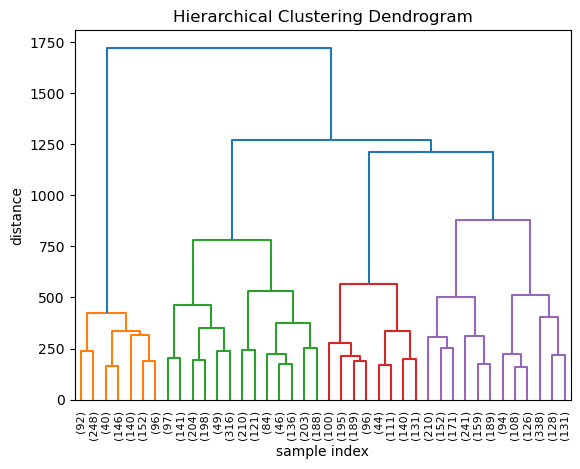

In [35]:
N_leafs = 40 #Number of leaf nodes.

plt.figure()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

den = dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
    truncate_mode='lastp',
    p = N_leafs,
)
plt.show()

As explained above already, a huge jump in distance is typically what we're interested in if we want to argue for a certain number of clusters. If you have the chance to do this manually, i'd always opt for that, as it allows you to gain some insights into your data and to perform some sanity checks on the edge cases. In our case i'd probably just say that our cut-off is 1250 for gender (we know that (in general) there are just 2 genders (and in our case since we have a binary variable for gender), amd 750 for race since we do not know how many genders are there, as the jump is pretty obvious:

In [36]:
# set cut-offs
max_d_gender = 2
max_d_race = 5

gender_labels = labels['gender']
race_labels = labels['race']

In [37]:
#look at the individual clusters
k=max_d_gender #Number of clusters. Determine a usable number from dendrogram

cluster_designation = fcluster(Z, k, criterion='maxclust') #Get cluster designation of data points

np.set_printoptions(threshold=np.inf)

for i in range(1,k+1):
    datapoints = np.where(cluster_designation==i,)
    datapoints = datapoints[0].tolist()
    print('The labels associated with cluster {} is:'.format(i))
    print(gender_labels[datapoints].values)
    print('\n')
    
np.set_printoptions(threshold=False)

# FOR GENDER DOES NOT MAKE SENSE TO DO THIS. SEE:

The labels associated with cluster 1 is:
[1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1
 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1
 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0
 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1
 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0
 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0
 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1
 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 

In [40]:
#look at the individual clusters
k=max_d_race #Number of clusters. Determine a usable number from dendrogram

cluster_designation = fcluster(Z, k, criterion='maxclust') #Get cluster designation of data points

np.set_printoptions(threshold=np.inf)

for i in range(1,k+1):
    datapoints = np.where(cluster_designation==i,)
    datapoints = datapoints[0].tolist()
    values, counts = np.unique(race_labels[datapoints].values, return_counts=True)
    print('The labels associated with cluster {} is:'.format(i))
    print(race_labels[datapoints].values)
    print('Valuses, counts: ', values, counts)
    print('\n')
    
np.set_printoptions(threshold=False)

The labels associated with cluster 1 is:
[0 3 0 2 3 2 3 2 0 0 0 3 1 0 2 0 2 0 2 2 0 1 0 2 3 0 3 0 2 4 0 4 1 3 2 3 2
 3 4 3 3 4 0 4 0 0 1 4 2 0 3 2 0 2 0 3 0 3 0 2 3 0 4 0 0 3 2 4 0 2 2 0 3 0
 2 2 2 0 0 4 3 0 4 3 4 2 2 2 4 3 2 2 0 2 2 0 2 2 3 2 0 2 2 4 2 2 0 4 0 2 3
 2 1 3 0 2 0 3 1 2 3 2 4 2 4 3 2 2 0 0 2 3 0 0 2 1 2 4 0 2 0 3 0 2 0 4 4 1
 1 2 0 3 2 4 4 2 2 3 2 2 1 2 2 4 2 2 0 2 4 1 2 4 4 4 0 2 0 2 3 2 4 2 4 0 2
 3 4 0 2 2 3 2 0 2 3 0 0 2 0 2 2 2 0 2 0 2 2 0 1 0 0 3 3 2 2 2 0 0 0 4 2 4
 4 2 3 2 2 4 0 4 3 3 0 2 2 0 2 3 2 4 3 2 2 0 0 3 2 2 2 3 2 2 2 3 0 2 3 1 0
 2 0 2 2 3 3 0 2 0 2 0 0 0 2 1 2 3 2 2 2 0 2 2 1 0 3 2 4 3 2 0 2 3 2 2 0 2
 3 3 0 2 0 0 0 0 4 1 2 0 2 0 0 2 2 4 0 0 2 1 0 2 3 0 2 1 4 2 4 4 3 1 0 3 2
 0 2 2 3 3 2 3 4 2 3 4 2 2 0 4 2 3 2 0 2 0 2 0 4 0 0 3 3 4 0 2 0 4 3 0 4 2
 2 4 4 0 0 1 4 4 2 4 4 0 0 2 3 2 4 2 2 4 2 3 2 2 2 4 4 2 1 4 2 2 3 2 2 3 3
 2 0 0 0 2 4 3 0 2 0 4 3 0 4 4 4 0 2 3 2 0 4 2 0 0 1 3 0 1 2 3 4 0 2 4 0 0
 0 2 2 2 3 4 3 4 2 4 2 4 2 2 0 0 3 0 0 0 0 2 3 4 4 3 2 2 2 

The closer the value is to 1, the better the clustering preserves the original distances, which in our case is pretty far (maybe we should take another method and/or distance in linkage()):

In [41]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(images))
c

0.4457060414379399

The cophenetic correlation for a cluster tree is defined as the linear correlation coefficient between the cophenetic distances obtained from the tree, and the original distances (or dissimilarities) used to construct the tree. Thus, it is a measure of how faithfully the tree represents the dissimilarities among observations.

The output value, c, is the cophenetic correlation coefficient. The magnitude of this value should be very close to 1 for a high-quality solution. This measure can be used to compare alternative cluster solutions obtained using different algorithms.

#### Method: Metric:

0.41652038978301864
0.42922882554275926
0.47014409704841037
0.3819537622739873
0.4457060414379399
method:  average
metric:  euclidean
cophenet corr coef:  0.47014409704841037


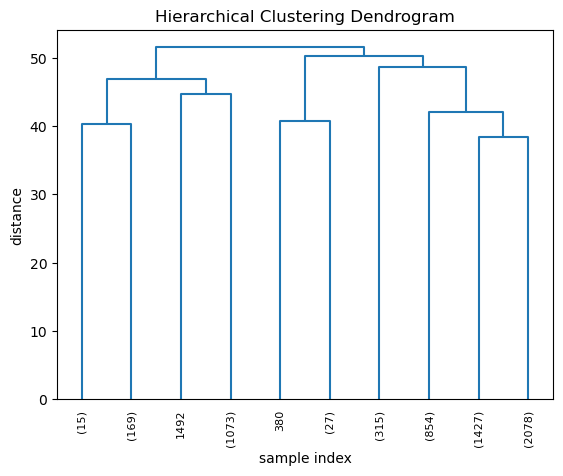

In [42]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# metrics = ['euclidean','hamming','correlation', 'mahalanobis']    # 'hamming' -> manhattan distance
# methods = ['single','complete','average','weighted','ward']

metrics = ['euclidean']  
methods = ['single','complete','average','weighted','ward']


best_coph = 0
best_c = 0
best_method = ''
best_metric = ''

for metric in metrics: 
    for method in methods: 
        if (method=='ward' and metric!='euclidean')==False:
            Z = linkage(imgs_3pc, method=method, metric=metric)
            c, _ = cophenet(Z, pdist(images))
            print(c)
        
        if c > best_c:
            best_Z = Z
            best_c = c
            best_method = method
            best_metric = metric

print('method: ', best_method)
print('metric: ', best_metric)
print('cophenet corr coef: ', best_c)
        

plt.figure()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

N_leafs = 10
den = dendrogram(
    best_Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
    truncate_mode='lastp',
    p = N_leafs,
)
plt.show()

# Method 'ward' requires the distance metric to be Euclidean

In [44]:
#look at the individual clusters
k=max_d_race #Number of clusters. Determine a usable number from dendrogram

cluster_designation = fcluster(Z, k, criterion='maxclust') #Get cluster designation of data points

np.set_printoptions(threshold=np.inf)

for i in range(1,k+1):
    datapoints = np.where(cluster_designation==i,)
    datapoints = datapoints[0].tolist()
    values, counts = np.unique(race_labels[datapoints].values, return_counts=True)
    print('The labels associated with cluster {} is:'.format(i))
    print(race_labels[datapoints].values)
    print('Valuses, counts: ', values, counts)
    print('\n')
    
np.set_printoptions(threshold=False)

The labels associated with cluster 1 is:
[0 3 0 2 3 2 3 2 0 0 0 3 1 0 2 0 2 0 2 2 0 1 0 2 3 0 3 0 2 4 0 4 1 3 2 3 2
 3 4 3 3 4 0 4 0 0 1 4 2 0 3 2 0 2 0 3 0 3 0 2 3 0 4 0 0 3 2 4 0 2 2 0 3 0
 2 2 2 0 0 4 3 0 4 3 4 2 2 2 4 3 2 2 0 2 2 0 2 2 3 2 0 2 2 4 2 2 0 4 0 2 3
 2 1 3 0 2 0 3 1 2 3 2 4 2 4 3 2 2 0 0 2 3 0 0 2 1 2 4 0 2 0 3 0 2 0 4 4 1
 1 2 0 3 2 4 4 2 2 3 2 2 1 2 2 4 2 2 0 2 4 1 2 4 4 4 0 2 0 2 3 2 4 2 4 0 2
 3 4 0 2 2 3 2 0 2 3 0 0 2 0 2 2 2 0 2 0 2 2 0 1 0 0 3 3 2 2 2 0 0 0 4 2 4
 4 2 3 2 2 4 0 4 3 3 0 2 2 0 2 3 2 4 3 2 2 0 0 3 2 2 2 3 2 2 2 3 0 2 3 1 0
 2 0 2 2 3 3 0 2 0 2 0 0 0 2 1 2 3 2 2 2 0 2 2 1 0 3 2 4 3 2 0 2 3 2 2 0 2
 3 3 0 2 0 0 0 0 4 1 2 0 2 0 0 2 2 4 0 0 2 1 0 2 3 0 2 1 4 2 4 4 3 1 0 3 2
 0 2 2 3 3 2 3 4 2 3 4 2 2 0 4 2 3 2 0 2 0 2 0 4 0 0 3 3 4 0 2 0 4 3 0 4 2
 2 4 4 0 0 1 4 4 2 4 4 0 0 2 3 2 4 2 2 4 2 3 2 2 2 4 4 2 1 4 2 2 3 2 2 3 3
 2 0 0 0 2 4 3 0 2 0 4 3 0 4 4 4 0 2 3 2 0 4 2 0 0 1 3 0 1 2 3 4 0 2 4 0 0
 0 2 2 2 3 4 3 4 2 4 2 4 2 2 0 0 3 0 0 0 0 2 3 4 4 3 2 2 2 

### K-Means Clustering

In [45]:
imgs_3pc.shape

(5960, 40000)

#### Elbow-method

In [46]:
from sklearn.cluster import KMeans

scores_nClusters = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    s = kmeans.fit(imgs_3pc)
    centers = s.cluster_centers_
    labels = s.labels_
    distortion = s.inertia_
    scores_nClusters.append(distortion)
    

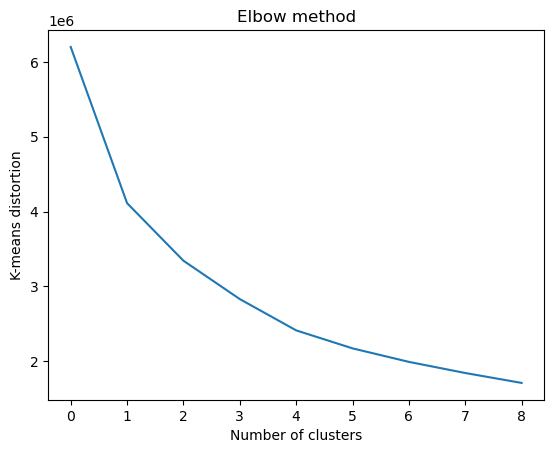

In [47]:
plt.ylabel('K-means distortion')
plt.xlabel('Number of clusters')
plt.title('Elbow method')
plt.style.context('seaborn-whitegrid')
plt.plot(scores_nClusters)
plt.show()

In [48]:
scores_nClusters

[6199903.123764638,
 4113005.155560228,
 3343567.4843722587,
 2831007.200438476,
 2412930.04953173,
 2172521.0711438367,
 1991975.271082661,
 1843414.3484915434,
 1710805.781371173]

The elbow method is not always clear, it can get confusing sometimes. Hence, we could use better: 

#### Silhouette coefficient

The silhouette coefficient is between -1 and +1. A coefficient close to +1 means that the observation is well inside its own cluster and far from other clusters. A coefficient close 0 that it is close to a cluster boundary. A coefficient clise to -1 means that the observation may have been assigned to the wrong cluster.

Silhouette diagram each diagram have the shape of a knife. The shape's height indicates the number of observations the cluster contains. The shapes width is the sorted silhouette coefficients of the observations in the cluster (wider is better). The vertical line is the mean silhoutte coefficient.

For n_clusters = 2 The average silhouette_score is : 0.29551791370357855
For n_clusters = 3 The average silhouette_score is : 0.25638594351439764
For n_clusters = 4 The average silhouette_score is : 0.2486464017031003
For n_clusters = 5 The average silhouette_score is : 0.25481395277941066
For n_clusters = 6 The average silhouette_score is : 0.24194101607823035
For n_clusters = 7 The average silhouette_score is : 0.23544377841614858
For n_clusters = 8 The average silhouette_score is : 0.22979437498669972
For n_clusters = 9 The average silhouette_score is : 0.23494465481298418
For n_clusters = 10 The average silhouette_score is : 0.23237675303884353


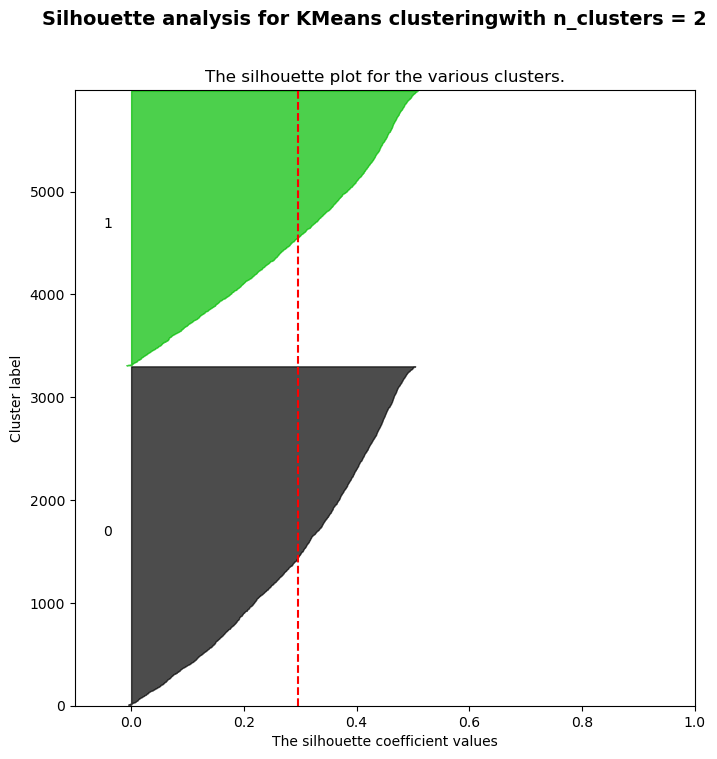

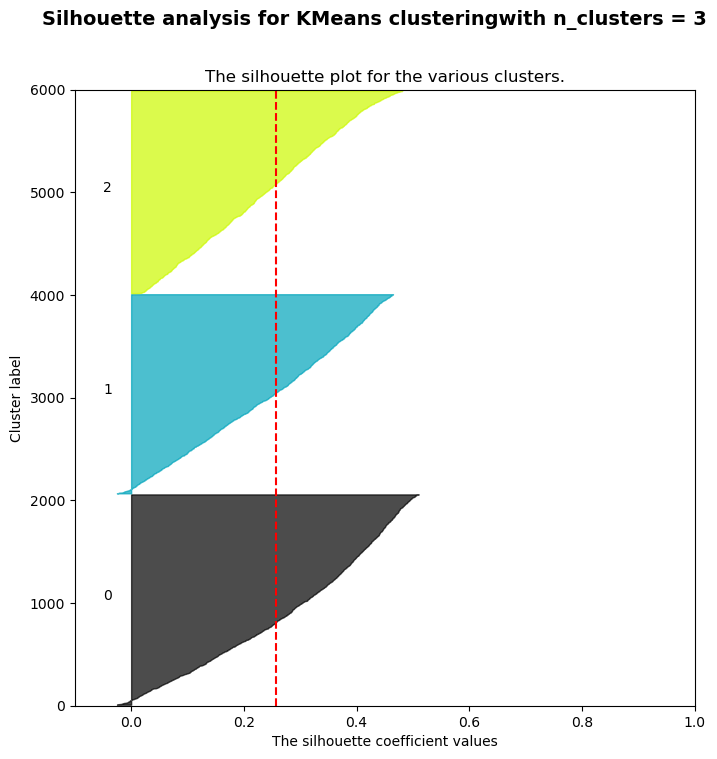

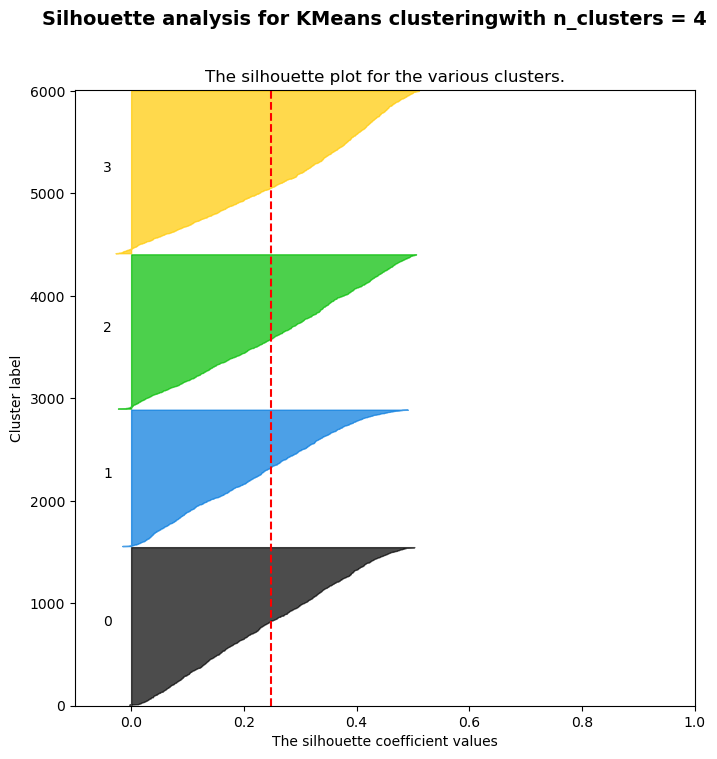

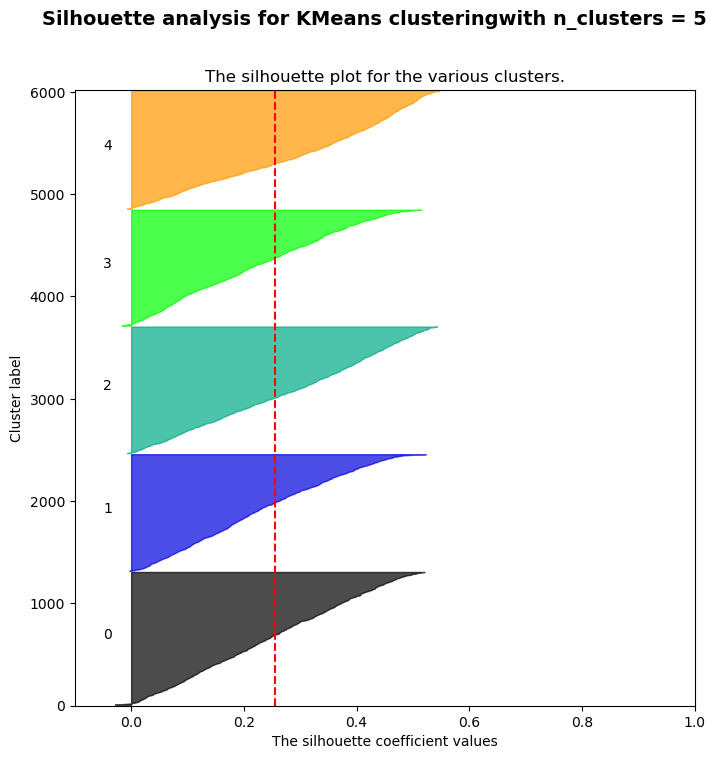

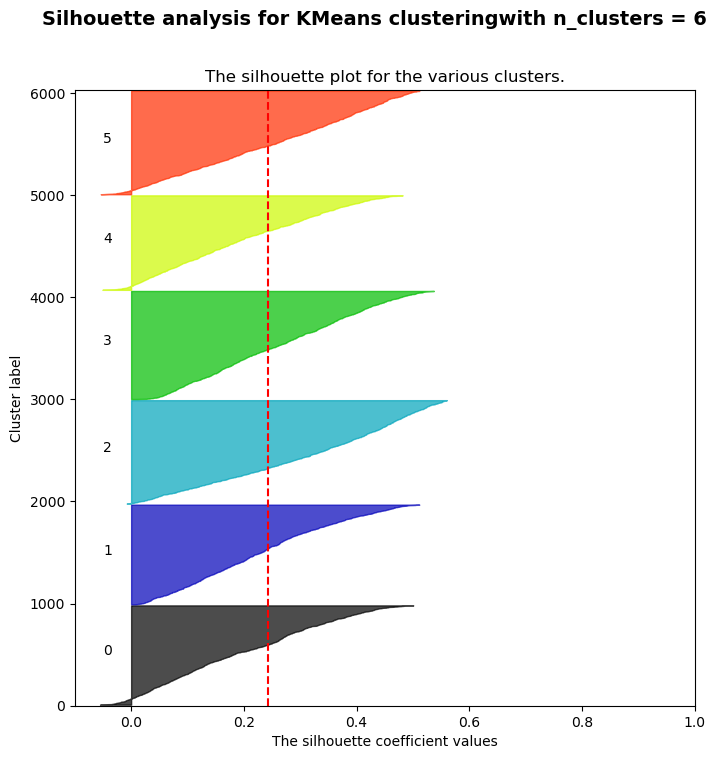

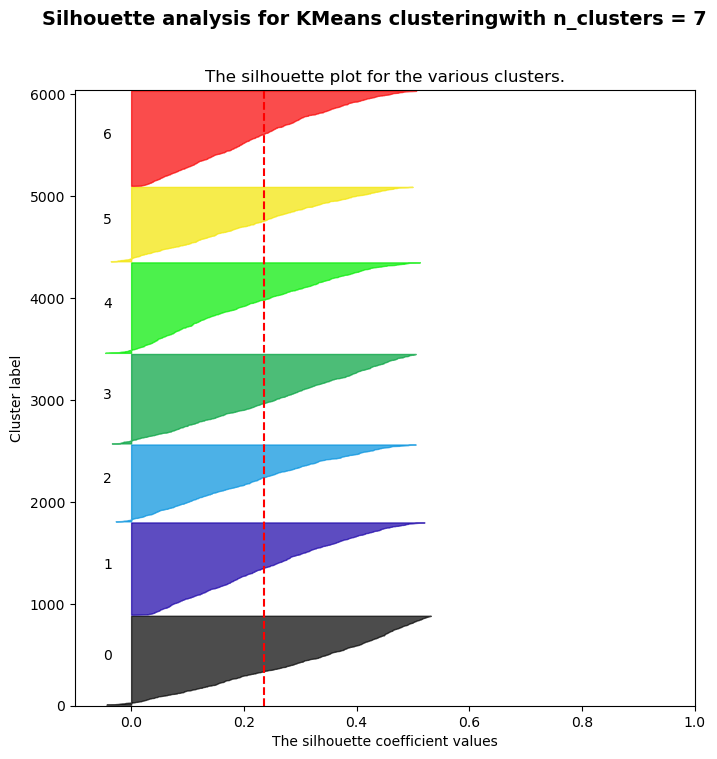

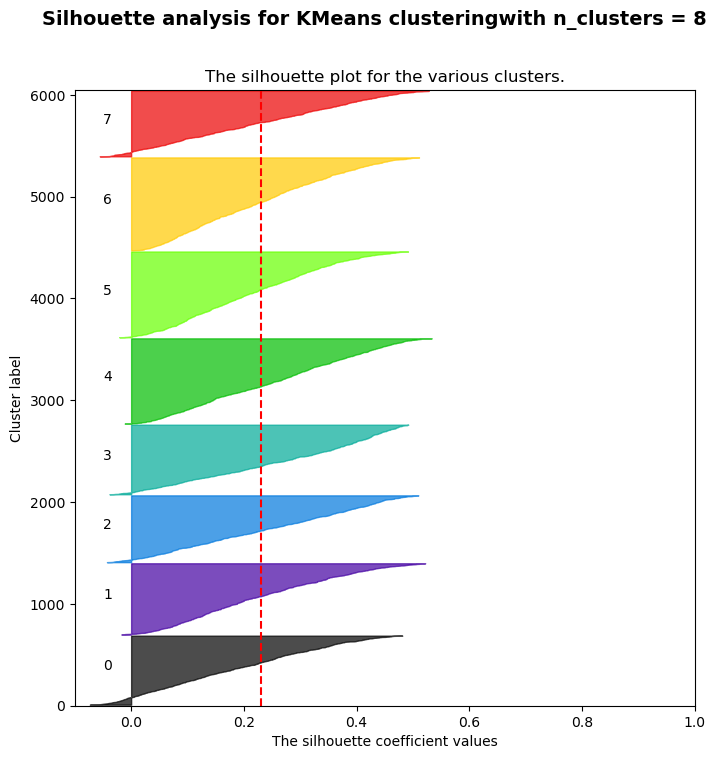

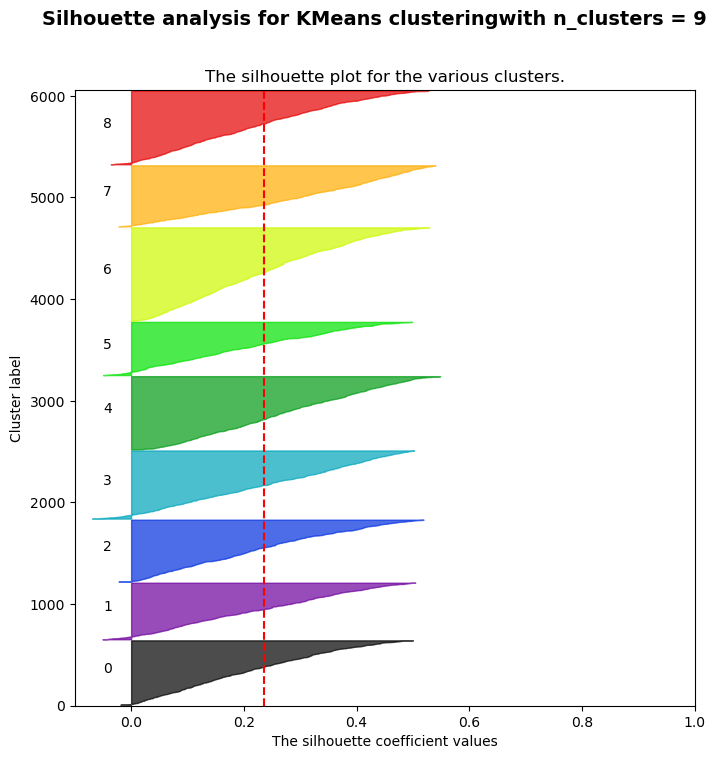

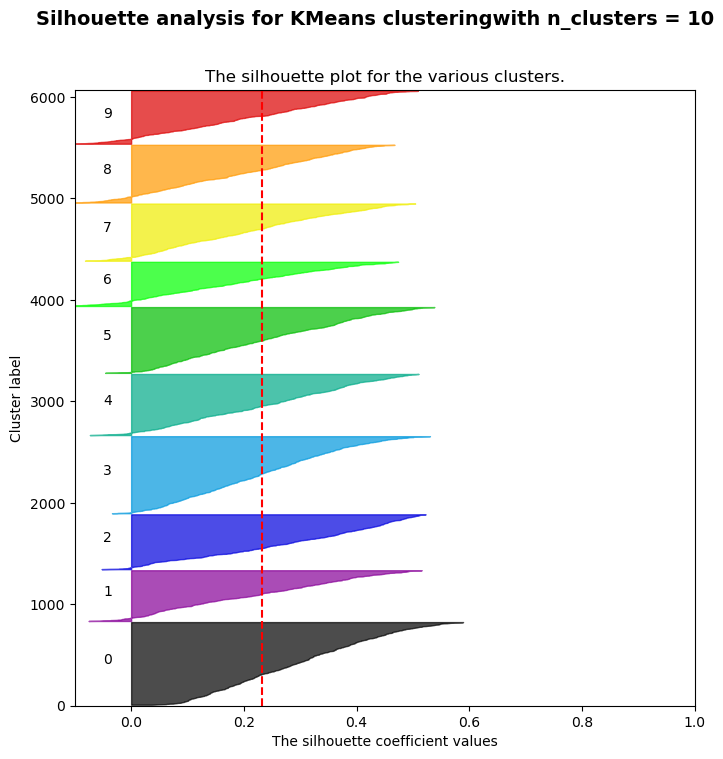

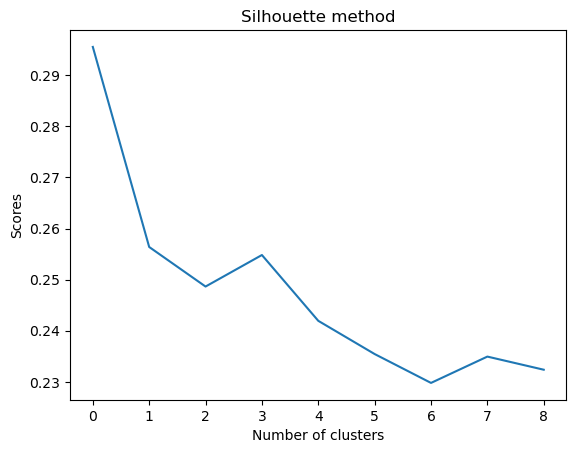

In [49]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
#X = dfscaled.copy()

silhouette_scores = []


for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(imgs_3pc) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(imgs_3pc)
    silhouette_avg = silhouette_score(imgs_3pc, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(imgs_3pc, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    
    plt.suptitle(("Silhouette analysis for KMeans clustering"
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


plt.ylabel('Scores')
plt.xlabel('Number of clusters')
plt.title('Silhouette method')
plt.style.context('seaborn-whitegrid')
plt.plot(silhouette_scores)
plt.show()

### Non-negative Matrix Factorization

https://www.kaggle.com/code/elenageminiani/nmf-and-image-compression/report